<html>
<body>

<h1 id="H"> Sentiment Analysis on Movie Reviews</h1>

- <a href="#C1">1. Problem Description</a>
- <a href="#C2">2. Load the Dataset and Have a First Look</a>
- <a href="#C3">3. Preprocessing of Text: Vectorizer</a>
- <a href="#C4">4. Modeling, Evaluation and Improving the Model</a>
- <a href="#C5">5. Predict the Sentiment labels of Sentiment_unknow Set</a>
- <a href="#C6">6. Conclusion</a>

<h2 id="C1">1. Problem Description</h2>

<p>
Opinion mining or sentiment analysis aims to determine the attitude of a critic or customer or other subject with respected to a topic. And in this project, attitude of critics and users towards various movies is what we are concerned. 
</p>
<p>Cognitive insight is important for online streaming or shopping website, because it can help to predict whether customers like or dislike a movie or other products. When they submit a new comment, the website can offer some feedback according to customers’ attitude. And in this project, the data is from kaggle.com.
</p>
<p>And the goal of the project is to produce an algorithm to classify phrases into 5 categories: negative, somewhat negative, neutral, somewaht postive and positive.
</p>

In [3]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
senti_known= pd.read_csv('train.tsv/train.tsv',delimiter='\t',encoding='utf-8')
senti_unknown = pd.read_csv('test.tsv/test.tsv',delimiter='\t',encoding='utf-8')

<h2 id='C2'>2. Load the Dataset and Have a First Look</h2>

### 2.1 Data set with sentiment labels

In [4]:
senti_known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
senti_known.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


### 2.2 Five sentiment levels

In [6]:
Sentiment = set()
for i in senti_known.Sentiment:
    Sentiment.add(i)
print(Sentiment)

{0, 1, 2, 3, 4}


- 0 : negative
- 1 : somewhat negative
- 2 : neutral
- 3 : somewhat positive
- 4 : positive

### 2.3 Data set without sentiment labels

In [7]:
senti_unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [8]:
senti_unknown.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


<h2 id='C2'>3. Preprocessing of Text: Vectorizer</h2>

### 3.1 Count Vectorizer with ngram_range=(1,2)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Create a series to store the labels: y
y = senti_known['Sentiment']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(senti_known.Phrase,y,test_size=0.33,random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer1 = CountVectorizer(stop_words= "english",ngram_range=(1,2))

# Transform the training data using only the 'text' column values: count_train 
count_train1 = count_vectorizer1.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test1 = count_vectorizer1.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer1.get_feature_names()[:10])

['000', '000 leagues', '000 times', '10', '10 000', '10 15', '10 course', '10 minutes', '10 powerpuff', '10 seconds']


### 3.2 Count Vectorizer with ngram_range=(3,4)

In [10]:
count_vectorizer2 = CountVectorizer(stop_words= "english",ngram_range=(3,4))

# Transform the training data using only the 'text' column values: count_train 
count_train2 = count_vectorizer2.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test2 = count_vectorizer2.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer2.get_feature_names()[:10])

['000 leagues sea', '000 leagues sea george', '10 000 times', '10 15 minutes', '10 15 minutes cut', '10 15 minutes wendigo', '10 course banquet', '10 minutes film', '10 minutes film ll', '10 minutes past']


### 3.3 Tfidf Vectorizer with ngram_range=(1,2)

In [26]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer1 = TfidfVectorizer(stop_words='english',max_df=0.7,ngram_range=(3,4))

# Transform the training data: tfidf_train 
tfidf_train1 = tfidf_vectorizer1.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test1 = tfidf_vectorizer1.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer1.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train[:5])

['000 leagues sea', '000 leagues sea george', '10 000 times', '10 15 minutes', '10 15 minutes cut', '10 15 minutes wendigo', '10 course banquet', '10 minutes film', '10 minutes film ll', '10 minutes past']
  (0, 2148)	0.710380191113
  (0, 5437)	0.461241602095
  (0, 8522)	0.531616561604
  (1, 2559)	0.590848100277
  (1, 11239)	0.635172612276
  (1, 5571)	0.49744776109
  (2, 6550)	0.690622630263
  (2, 555)	0.472487683103
  (2, 13534)	0.547536091856
  (3, 8819)	0.83865106412
  (3, 11480)	0.544669067095
  (4, 10196)	1.0


### 3.3 Tfidf Vectorizer with ngram_range=(3,4)

In [25]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english',max_df=0.7,ngram_range=(3,4))

# Transform the training data: tfidf_train 
tfidf_train2 = tfidf_vectorizer2.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test2 = tfidf_vectorizer2.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer2.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train[:5])

['000 leagues sea', '000 leagues sea george', '10 000 times', '10 15 minutes', '10 15 minutes cut', '10 15 minutes wendigo', '10 course banquet', '10 minutes film', '10 minutes film ll', '10 minutes past']
  (0, 2148)	0.710380191113
  (0, 5437)	0.461241602095
  (0, 8522)	0.531616561604
  (1, 2559)	0.590848100277
  (1, 11239)	0.635172612276
  (1, 5571)	0.49744776109
  (2, 6550)	0.690622630263
  (2, 555)	0.472487683103
  (2, 13534)	0.547536091856
  (3, 8819)	0.83865106412
  (3, 11480)	0.544669067095
  (4, 10196)	1.0


<h2 id='C4'>4. Modeling, Evaluation and Improving the Model</h2>

### 4.1 Train and evaluate the multinomial naive bayes model by the training data with count vectorier

In [13]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train1,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test1)
print(pred)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm =  metrics.confusion_matrix(y_test,pred,labels=[0,1,2,3,4])
print(cm)


[1 2 2 ..., 2 3 2]
0.60786407767
[[  887  1054   325    45     4]
 [  877  4346  3439   426    44]
 [  352  2908 19176  3389   358]
 [   54   450  3522  5630  1125]
 [    4    42   320  1457  1266]]


### 4.2 Improving the model of 4.1 by tweaking alpha level 

In [18]:
# Create the list of alphas: alphas
alphas = np.arange(0,5,0.1)

# Define train_and_predict()
def train_and_predict(alpha,count_train,count_test):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(count_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(count_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

print('ngram_range=(1,2)')
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha,count_train1,count_test1))

print('ngram_range=(3,4)')
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha,count_train2,count_test2))


ngram_range=(1,2)
Alpha:  0.0
Score:  0.560796116505
Alpha:  0.1
Score:  0.569126213592
Alpha:  0.2


C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.575708737864
Alpha:  0.3
Score:  0.58227184466
Alpha:  0.4
Score:  0.587359223301
Alpha:  0.5
Score:  0.592174757282
Alpha:  0.6
Score:  0.595747572816
Alpha:  0.7
Score:  0.599300970874
Alpha:  0.8
Score:  0.602757281553
Alpha:  0.9
Score:  0.605029126214
Alpha:  1.0
Score:  0.60786407767
Alpha:  1.1
Score:  0.609417475728
Alpha:  1.2
Score:  0.611009708738
Alpha:  1.3
Score:  0.61267961165
Alpha:  1.4
Score:  0.61454368932
Alpha:  1.5
Score:  0.614951456311
Alpha:  1.6
Score:  0.61627184466
Alpha:  1.7
Score:  0.617126213592
Alpha:  1.8
Score:  0.617825242718
Alpha:  1.9
Score:  0.618077669903
Alpha:  2.0
Score:  0.618116504854
Alpha:  2.1
Score:  0.619689320388
Alpha:  2.2
Score:  0.619417475728
Alpha:  2.3
Score:  0.619126213592
Alpha:  2.4
Score:  0.619902912621
Alpha:  2.5
Score:  0.619766990291
Alpha:  2.6
Score:  0.61959223301
Alpha:  2.7
Score:  0.619398058252
Alpha:  2.8
Score:  0.618990291262
Alpha:  2.9
Score:  0.619650485437
Alpha:  3.0
Score:  0.620058252427
Alp

According to the outcome above, best alpha of multinomial NB is 2.4 for countvectorizer and (1,2) is a better ngram_range, and best score is 0.620

### 4.3 Train and evaluate the multinomial naive bayes model by the training data with tfidf vectorier

In [27]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train1,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test1)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=[0,1,2,3,4])
print(cm)


0.571339805825
[[  142   600  1564     9     0]
 [   84  1628  7337    82     1]
 [   14   552 24901   707     9]
 [    0    84  8092  2493   112]
 [    0    11  1869   949   260]]


### 4.4 Improving the model of 4.3 by tweaking alpha level

In [38]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.02)

# Define train_and_predict()
def train_and_predict(alpha,tfidf_train,tfidf_test):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

print('ngram_range=(1,2)')
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha,tfidf_train1,tfidf_test1))
    print()

print('ngram_range=(3,4)')
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha,tfidf_train2,tfidf_test2))
    print()


ngram_range=(1,2)
Alpha:  0.0
Score:  0.591223300971

Alpha:  0.02
Score:  0.593106796117

Alpha:  0.04


C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.594388349515

Alpha:  0.06
Score:  0.595262135922

Alpha:  0.08
Score:  0.595844660194

Alpha:  0.1
Score:  0.596485436893

Alpha:  0.12
Score:  0.597126213592

Alpha:  0.14
Score:  0.597398058252

Alpha:  0.16
Score:  0.597766990291

Alpha:  0.18
Score:  0.598077669903

Alpha:  0.2
Score:  0.598291262136

Alpha:  0.22
Score:  0.598155339806

Alpha:  0.24
Score:  0.59827184466

Alpha:  0.26
Score:  0.597669902913

Alpha:  0.28
Score:  0.597631067961

Alpha:  0.3
Score:  0.597106796117

Alpha:  0.32
Score:  0.59640776699

Alpha:  0.34
Score:  0.595961165049

Alpha:  0.36
Score:  0.595514563107

Alpha:  0.38
Score:  0.595378640777

Alpha:  0.4
Score:  0.594834951456

Alpha:  0.42
Score:  0.593961165049

Alpha:  0.44
Score:  0.593281553398

Alpha:  0.46
Score:  0.592757281553

Alpha:  0.48
Score:  0.592058252427

Alpha:  0.5
Score:  0.591533980583

Alpha:  0.52
Score:  0.591378640777

Alpha:  0.54
Score:  0.590446601942

Alpha:  0.56
Score:  0.59

Alpha:  0.58
Score:  0.58933980

According to the outcome above, best alpha of multinomial NB is 0.2 for tfidfvectorizer and (1,2) is a better ngram_range, and best score is 0.598.

### 4.5  Inspect the model and explore the vector weights of actual words

In [34]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = count_vectorizer1.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

0 [(-11.603903263989569, '000'), (-11.603903263989569, '000 leagues'), (-11.603903263989569, '10 000'), (-11.603903263989569, '10 15'), (-11.603903263989569, '10 course'), (-11.603903263989569, '10 minutes'), (-11.603903263989569, '10 powerpuff'), (-11.603903263989569, '10 unlikely'), (-11.603903263989569, '10 year'), (-11.603903263989569, '100 minute'), (-11.603903263989569, '100 minutes'), (-11.603903263989569, '100 year'), (-11.603903263989569, '100 years'), (-11.603903263989569, '101'), (-11.603903263989569, '101 minutes'), (-11.603903263989569, '101 poetic'), (-11.603903263989569, '101 premise'), (-11.603903263989569, '102'), (-11.603903263989569, '102 minute'), (-11.603903263989569, '103 minute')]
1 [(-10.118002703003793, 'movies life'), (-10.110902491805263, 'stylistically borrows'), (-10.098716949406356, 'theater shout'), (-10.091010963144793, 'stanford'), (-10.068856652280468, 'cox offers'), (-10.039781025632665, 'clerk wanting'), (-10.035493616140164, 'norrington'), (-10.0299

<h2 id='C5'> 5. Predict the Sentiment labels of Sentiment_unknow Set</h2>

[3 3 2 ..., 2 2 2]


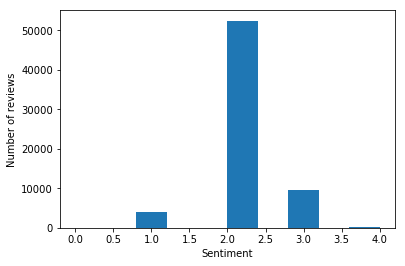

In [40]:
X_senti_unknown = senti_unknown.Phrase
count_senti_unknown = count_vectorizer1.transform(X_senti_unknown)
# Instantiate the classifier: nb_classifier
nb_classifier = MultinomialNB(alpha=2.4)
# Fit to the training data
nb_classifier.fit(count_train1,y_train)
pred_senti_unknown = nb_classifier.predict(count_senti_unknown)
print(pred_senti_unknown)
_ = plt.hist(pred_senti_unknown)
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')

<h2 id='C6'>6. Conclusion</h2>
<p>In this project, a mutilnomial model is built to analyze the sentiment of moie reviews. Compared with tfidf vectoriser, count vectoriser is a better choice. And best alpha is 2.4 for the model trained by data with count vectorizer(ngram_range=(1,2)), while it's 0.02 for tfidf vectoriser. And best accuracy score with this model is 0.620. </p>

</html>
</body>